In [1]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data from CSV file
data = pd.read_csv('churn_clean.csv')

In [3]:
# Function to clean column names

def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df


In [4]:
# Renaming columns for the columns related to survey questions
data.rename(columns={'Item1':'Timely_response','Item2':'Timely_fixes','Item3':'Timely_replacements',
                     'Item4':'Reliability','Item5':'Options','Item6':'Respectful_response',
                     'Item7':'Courteous_exchange','Item8':'Evidence_of_active_listening'}, inplace=True)

In [5]:
# Check for null values
data.isna().any(axis=0).any()

False

In [6]:
# Checking number of unique values in each column
data.nunique()

CaseOrder                       10000
Customer_id                     10000
Interaction                     10000
UID                             10000
City                             6058
State                              52
County                           1620
Zip                              8583
Lat                              8563
Lng                              8630
Population                       5933
Area                                3
TimeZone                           25
Job                               639
Children                           11
Age                                72
Income                           9993
Marital                             5
Gender                              3
Churn                               2
Outage_sec_perweek               9986
Email                              23
Contacts                            8
Yearly_equip_failure                6
Techie                              2
Contract                            3
Port_modem  

In [7]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.

for col in data.columns:
    if data[col].nunique()<100:
        print(col, sorted(data[col].unique()), '\n')


State ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'] 

Area ['Rural', 'Suburban', 'Urban'] 

TimeZone ['America/Anchorage', 'America/Boise', 'America/Chicago', 'America/Denver', 'America/Detroit', 'America/Indiana/Indianapolis', 'America/Indiana/Knox', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Tell_City', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Juneau', 'America/Kentucky/Louisville', 'America/Los_Angeles', 'America/Menominee', 'America/New_York', 'America/Nome', 'America/North_Dakota/New_Salem', 'America/Ojinaga', 'America/Phoenix', 'America/Puerto_Rico', 'America/Sitka', 'America/Toronto', 'Pacific/Honolulu'] 

Children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Age [18, 19

In [8]:
# Following data columns are not important for data analysis (more details included in the report)
to_drop = ['City','County','Zip','Job','TimeZone',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder','State']

In [9]:
# Fix all columns
data = column_name_remove_space(data)
data.drop(columns=to_drop,inplace=True)

In [10]:
# Check data by printing first few rows
data.head()

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
0,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [11]:
# Check data by printing last few rows
data.tail()

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
9995,640,Rural,3,23,55723.74,Married,Male,No,9.415935,12,...,159.9794,6511.252601,3,2,3,3,4,3,2,3
9996,77168,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,...,207.4811,5695.951810,4,5,5,4,4,5,2,5
9997,406,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,...,169.9741,4159.305799,4,4,4,4,4,4,4,5
9998,35575,Urban,1,39,16667.58,Separated,Male,No,12.071910,14,...,252.6240,6468.456752,4,4,6,4,3,3,5,4
9999,12230,Urban,1,28,9020.92,Never Married,Male,No,11.754720,17,...,217.4840,5857.586167,2,2,3,3,3,3,4,1


In [12]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns = [
                          'Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet',
                         'InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup',
                          'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies',
                          'PaperlessBilling','PaymentMethod'
                         ]


dummy_data_file_index = 0

In [13]:
def get_dummy_data_with_output_no_drop_first(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= False)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['MonthlyCharge']
    dummy_data.drop(columns=['MonthlyCharge'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['MonthlyCharge']
    dummy_data.drop(columns=['MonthlyCharge'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(dummy_variable_columns, data)
y_, dummy_data_ = get_dummy_data_with_output_no_drop_first(dummy_variable_columns, data)

In [14]:
# Starting with imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [15]:
# Split the training and test set 7:3 
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)
# Splitting data for random forest (dummy variable , without drop first)
X_train_, X_test_, y_train_, y_test_ = train_test_split(dummy_data_,y_,test_size=.3, random_state=0)

In [16]:
# Creating a function to create Random Forest Model
figsize=(8,5)

def get_rf_model(y_train,X_train, X_test):
    rf = RandomForestRegressor()
    model=rf.fit(X_train, y_train_)
    for i, item in enumerate(rf.feature_importances_):
        print("{0:s}: {1:.2f}".format(X_train.columns[i], item))
    y_hat = model.predict(X_test)
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('\nPrinting Mean Squared Error:\n',(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nR2 Score:\n',r2_score(y_test, y_hat))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_hat, ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_hat,y=y_test-y_hat,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr

# Creating a function to create Multiple Linear Regression Model

def get_lr_model(y_train,X_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_]
    intercept = model.intercept_
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('\nPrinting Mean Squared Error from sklearn:\n',(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('\nR2 Score  from sklearn:\n',r2_score(y_test, y_pred))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_pred,color="g", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred,y=y_test-y_pred,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr, intercept


Population: 0.00
Children: 0.00
Age: 0.00
Income: 0.00
Outage_sec_perweek: 0.00
Email: 0.00
Contacts: 0.00
Yearly_equip_failure: 0.00
Tenure: 0.00
Bandwidth_GB_Year: 0.00
Timely_response: 0.00
Timely_fixes: 0.00
Timely_replacements: 0.00
Reliability: 0.00
Options: 0.00
Respectful_response: 0.00
Courteous_exchange: 0.00
Evidence_of_active_listening: 0.00
Churn_No: 0.00
Churn_Yes: 0.00
Area_Rural: 0.00
Area_Suburban: 0.00
Area_Urban: 0.00
Marital_Divorced: 0.00
Marital_Married: 0.00
Marital_Never_Married: 0.00
Marital_Separated: 0.00
Marital_Widowed: 0.00
Gender_Female: 0.00
Gender_Male: 0.00
Gender_Nonbinary: 0.00
Techie_No: 0.00
Techie_Yes: 0.00
Contract_Month-to-month: 0.00
Contract_One_year: 0.00
Contract_Two_Year: 0.00
Port_modem_No: 0.00
Port_modem_Yes: 0.00
Tablet_No: 0.00
Tablet_Yes: 0.00
InternetService_DSL: 0.01
InternetService_Fiber_Optic: 0.08
InternetService_None: 0.01
Phone_No: 0.00
Phone_Yes: 0.00
Multiple_No: 0.06
Multiple_Yes: 0.08
OnlineSecurity_No: 0.00
OnlineSecurity_

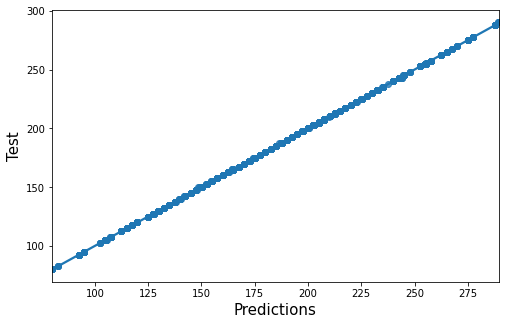

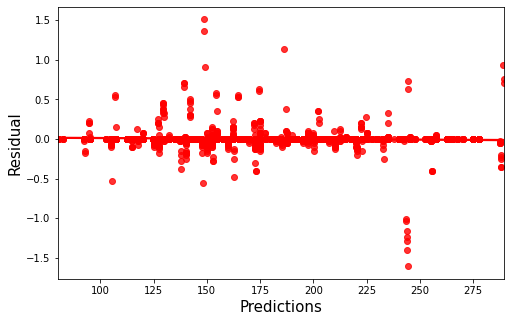


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '-4.582592453543534e-06']
 ['Children' '-9.525348898521825']
 ['Age' '1.0148120504728495']
 ['Income' '-3.1248429753501097e-07']
 ['Outage_sec_perweek' '0.012859486595596143']
 ['Email' '0.0060963425679170955']
 ['Contacts' '-0.04221411539162631']
 ['Yearly_equip_failure' '0.009950254848102663']
 ['Tenure' '-25.369530776316747']
 ['Bandwidth_GB_Year' '0.3096728503785915']
 ['Timely_response' '0.09997546599316007']
 ['Timely_fixes' '-0.03186915156536746']
 ['Timely_replacements' '0.032777295785373965']
 ['Reliability' '0.028618593930398426']
 ['Options' '-0.01566407141076019']
 ['Respectful_response' '-0.028477836626884197']
 ['Courteous_exchange' '-0.011307108357142008']
 ['Evidence_of_active_listening' '-0.004558169425577363']
 ['Churn_Yes' '0.3670408890528734']
 ['Area_Suburban' '-0.15035347949770086']
 ['Area_Urban' '-0.050436412622594934']
 ['Marital_Married' '0.032260238043964766']
 ['Marital_Nev

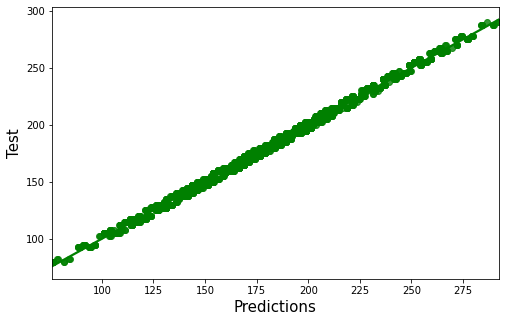

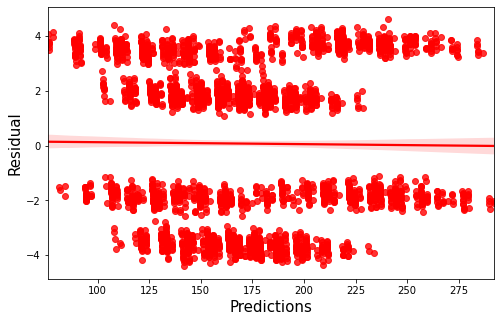

In [17]:
# Run random forect model function
model_rf, arr_sm = get_rf_model(y_train_,X_train_, X_test_);
# Run linear regression model
model_lr, arr, intercept = get_lr_model(y_train,X_train, X_test);


In [18]:
#from sklearn import tree
#plt.rcParams.update({'figure.figsize': (30, 9)})
#plt.rcParams.update({'font.size': 300})
#tree.plot_tree(model_rf.estimators_[0], feature_names=X_train.columns, filled=True)
#plt.savefig('tree_high_dpi', dpi=300)

In [19]:
print (len(model_rf.estimators_))
for md in model_rf.estimators_:
    print(md.score(X_test_, y_test_), '|',md.get_depth())

100
0.9999679202792636 | 16
0.9999736492673919 | 15
0.9999587557020917 | 17
0.9999576100764753 | 17
0.9999587543123568 | 16
0.9999873972134519 | 15
0.9999656286996665 | 14
0.9999679208307864 | 16
0.9999690658044579 | 15
0.9999713573363082 | 19
0.9999667752916351 | 17
0.9999862520765651 | 15
0.999957610098318 | 15
0.9999599014167626 | 16
0.9999644835908094 | 16
0.9999736491718214 | 15
0.9999713574109391 | 15
0.9999805230028755 | 15
0.99998166913725 | 16
0.9999644832421313 | 14
0.9999541717143302 | 15
0.9999690660641456 | 16
0.9999667752579562 | 17
0.999967920288367 | 16
0.9999599005627536 | 14
0.9999713574036483 | 15
0.9999610462998606 | 15
0.9999656289270134 | 15
0.9999782314977254 | 15
0.9999667748447729 | 15
0.9999736491053968 | 15
0.9999587550768374 | 16
0.9999404243896777 | 16
0.9999610463744915 | 14
0.9999759400499165 | 15
0.9999736487094913 | 14
0.9999759406569614 | 15
0.9999862519546098 | 16
0.9999805230238178 | 15
0.9999816691991278 | 14
0.999962192207838 | 18
0.999980522960112